In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\saivenkat'

# problem statement-Whether a cinema will win oscar or not based on the given inputs predict ouput

# loading dataset

In [3]:
Oscar=pd.read_csv("E:\SaiVenkat\Movie_classification.csv")
Oscar

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,NO,186.96,243.584,Action,27,561,44800,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,YES,132.24,263.296,Action,20,600,41200,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,NO,109.56,243.824,Comedy,31,576,47800,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,YES,158.80,303.520,Comedy,47,607,44000,0


# label--->start_Tech_Oscar


# Features ----> all the variables

In [5]:
Oscar.info() #checking info of all th variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [5]:
#In TIme taken variable there are missing values so fixing it

In [6]:
Oscar['Time_taken'].mean()

157.39149797570855

In [7]:
Oscar.fillna(Oscar['Time_taken'].mean(),axis=1,inplace=True) #replacing the missing values of time taken with mean of timetaken

In [8]:
Oscar.info() #now there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [9]:
#if we observe the columns 3D_Available and Genre are categorical values

In [10]:
Oscar['3D_available'].value_counts()       #its a cateogrical values of yes and no

YES    279
NO     227
Name: 3D_available, dtype: int64

In [11]:
Oscar['Genre'].value_counts()

Thriller    183
Comedy      155
Drama        97
Action       71
Name: Genre, dtype: int64

In [12]:
Oscar=pd.get_dummies(Oscar,columns=['3D_available','Genre'],drop_first=True)
Oscar

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,186.96,243.584,27,561,44800,0,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,132.24,263.296,20,600,41200,0,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,109.56,243.824,31,576,47800,0,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,158.80,303.520,47,607,44000,0,1,1,0,0


In [13]:
Oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [14]:
Oscar.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


# Separating features and label

In [15]:
x=Oscar.iloc[:,Oscar.columns!='Start_Tech_Oscar']
x

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,44800,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,41200,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,47800,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,44000,1,1,0,0


In [16]:
y=Oscar['Start_Tech_Oscar']
y

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    0
504    0
505    0
Name: Start_Tech_Oscar, Length: 506, dtype: int64

In [17]:
x.shape

(506, 20)

In [18]:
y.shape

(506,)

In [20]:
type(x)

pandas.core.frame.DataFrame

In [21]:
type(y)

pandas.core.series.Series

# Splitting data into training and testing part

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_train

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,25.6784,69.76,0.507,31707.940,147.8,7.545,7.700,7.550,7.765,8.08,446743,131.40,302.960,25,501,37000,1,1,0,0
192,21.7328,61.88,0.563,39873.790,99.8,6.620,6.830,6.700,6.895,7.96,515199,210.56,225.824,40,448,72800,1,0,1,0
117,23.0196,75.02,0.453,33446.655,156.1,8.615,8.755,8.540,8.595,7.44,454755,189.68,303.072,28,609,38400,0,0,0,0
47,24.5854,68.82,0.552,33496.650,159.0,7.085,7.180,7.125,7.230,7.42,374797,106.64,242.656,44,526,33200,1,0,0,1


In [24]:
x_test

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
329,21.3448,61.48,0.540,35179.815,90.7,7.320,7.460,7.275,7.515,8.62,483051,111.040000,283.616,53,452,45200,0,1,0,0
371,204.6460,91.20,0.369,34529.880,173.5,9.310,9.525,9.320,9.505,7.96,454281,196.000000,268.000,25,609,100000,1,1,0,0
219,22.2850,82.78,0.450,35402.015,165.9,8.175,8.375,8.315,8.405,8.72,451935,123.200000,263.680,21,561,46000,1,1,0,0
403,516.0340,91.20,0.307,29713.695,169.5,9.125,9.310,9.060,9.100,6.96,384237,157.391498,301.328,40,677,16600,1,0,0,1
78,21.1292,80.66,0.563,34618.760,127.2,7.330,7.500,7.450,7.690,8.26,447528,176.480000,303.392,53,377,42400,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,20.4110,56.48,0.590,35457.565,109.2,5.340,5.535,5.285,5.465,8.54,539589,115.880000,303.952,22,383,49400,1,0,1,0
455,115.0474,91.20,0.287,36246.375,160.0,8.695,8.790,8.630,9.015,6.96,408819,155.640000,282.256,36,620,28200,0,0,0,1
60,22.9864,65.26,0.547,31891.255,139.7,6.335,6.420,6.235,6.560,7.06,465689,157.391498,222.992,30,439,37400,0,0,0,1
213,22.8104,76.18,0.511,35413.125,105.8,7.945,8.040,7.910,8.215,7.28,504226,151.240000,204.496,3,441,56200,1,1,0,0


In [25]:
y_train

220    1
71     1
240    1
6      0
417    1
      ..
323    1
192    0
117    0
47     1
172    0
Name: Start_Tech_Oscar, Length: 404, dtype: int64

In [26]:
y_test

329    0
371    1
219    0
403    0
78     0
      ..
56     1
455    1
60     1
213    0
108    1
Name: Start_Tech_Oscar, Length: 102, dtype: int64

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(max_depth=5)

# fitting the model 

In [28]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

# predicting y values both train and test

In [29]:
y_train_pred=clf_tree.predict(x_train)
y_train_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,

In [30]:
y_test_pred=clf_tree.predict(x_test)
y_test

329    0
371    1
219    0
403    0
78     0
      ..
56     1
455    1
60     1
213    0
108    1
Name: Start_Tech_Oscar, Length: 102, dtype: int64

# Model Performance

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
confusion_matrix(y_train,y_train_pred)

array([[150,  36],
       [ 74, 144]], dtype=int64)

In [33]:
confusion_matrix(y_test,y_test_pred)

array([[28, 16],
       [27, 31]], dtype=int64)

In [34]:
accuracy_score(y_test,y_test_pred) #accuracy is very less for this model

0.5784313725490197

# Plotting decision tree 

In [35]:
from sklearn import tree
dot_data=tree.export_graphviz(clf_tree,out_file=None,feature_names=x_train.columns,filled=True)
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="Budget <= 30694.152\\ngini = 0.497\\nsamples = 404\\nvalue = [186, 218]", fillcolor="#e2f1fb"] ;\n1 [label="Marketing expense <= 24.613\\ngini = 0.157\\nsamples = 35\\nvalue = [3, 32]", fillcolor="#4ca6e7"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Collection <= 23300.0\\ngini = 0.444\\nsamples = 3\\nvalue = [2, 1]", fillcolor="#f2c09c"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0]", fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]", fillcolor="#399de5"] ;\n2 -> 4 ;\n5 [label="Producer_rating <= 9.552\\ngini = 0.061\\nsamples = 32\\nvalue = [1, 31]", fillcolor="#3fa0e6"] ;\n1 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 31\\nvalue = [0, 31]", fillcolor="#399de5"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]", fillcolor="#e58139"] ;\n5 -> 7 ;\n8 [label="Collection <= 63100.0\\ngini = 0.5\\nsamples = 369\\

In [36]:
from IPython.display import Image

In [37]:
import pydotplus

In [38]:
graph=pydotplus.graph_from_dot_data(dot_data)
graph

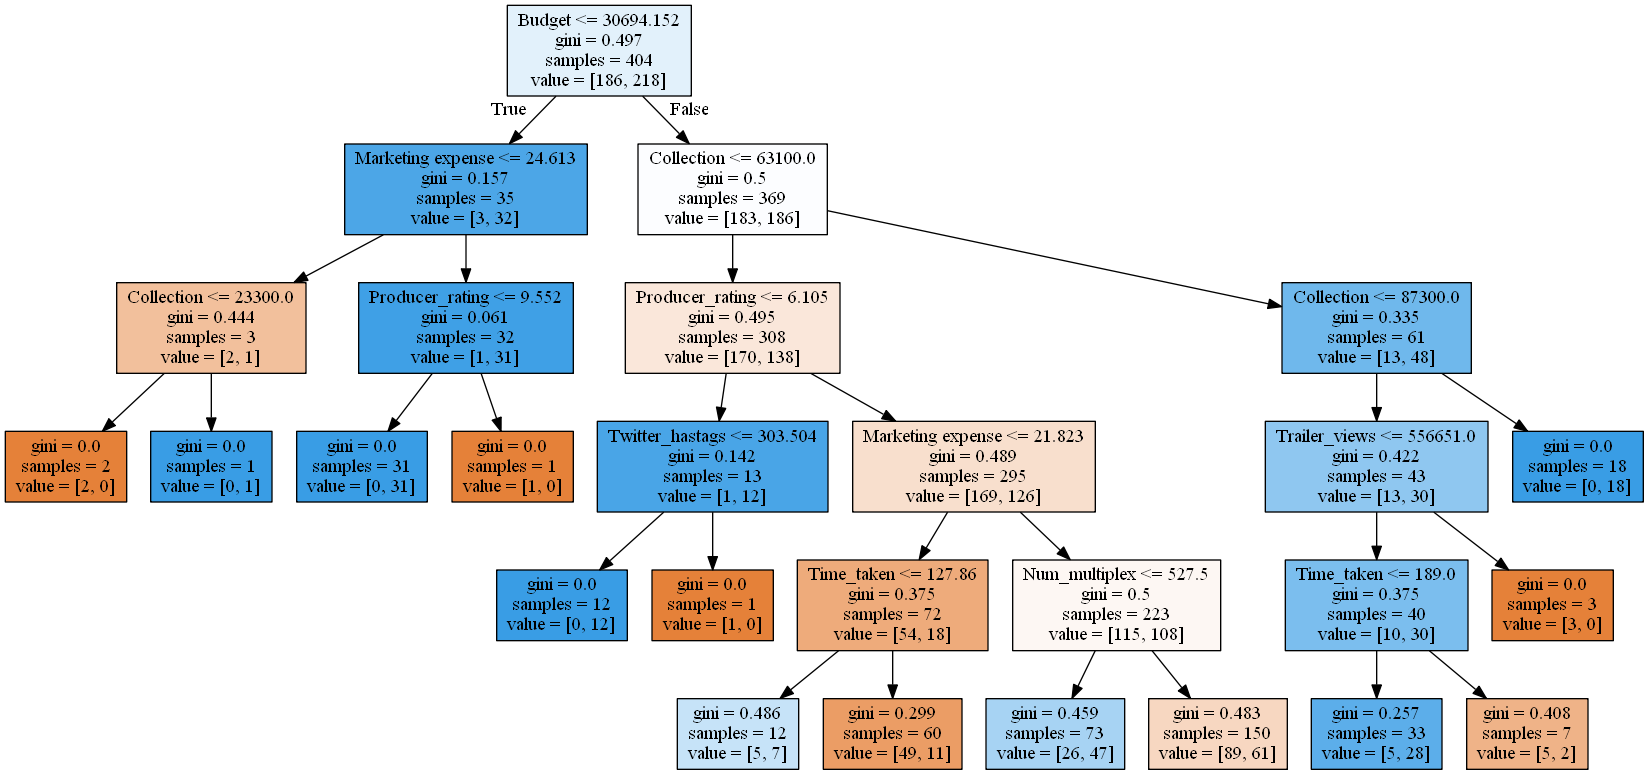

In [39]:
Image(graph.create_png())

# To see complete decision tree

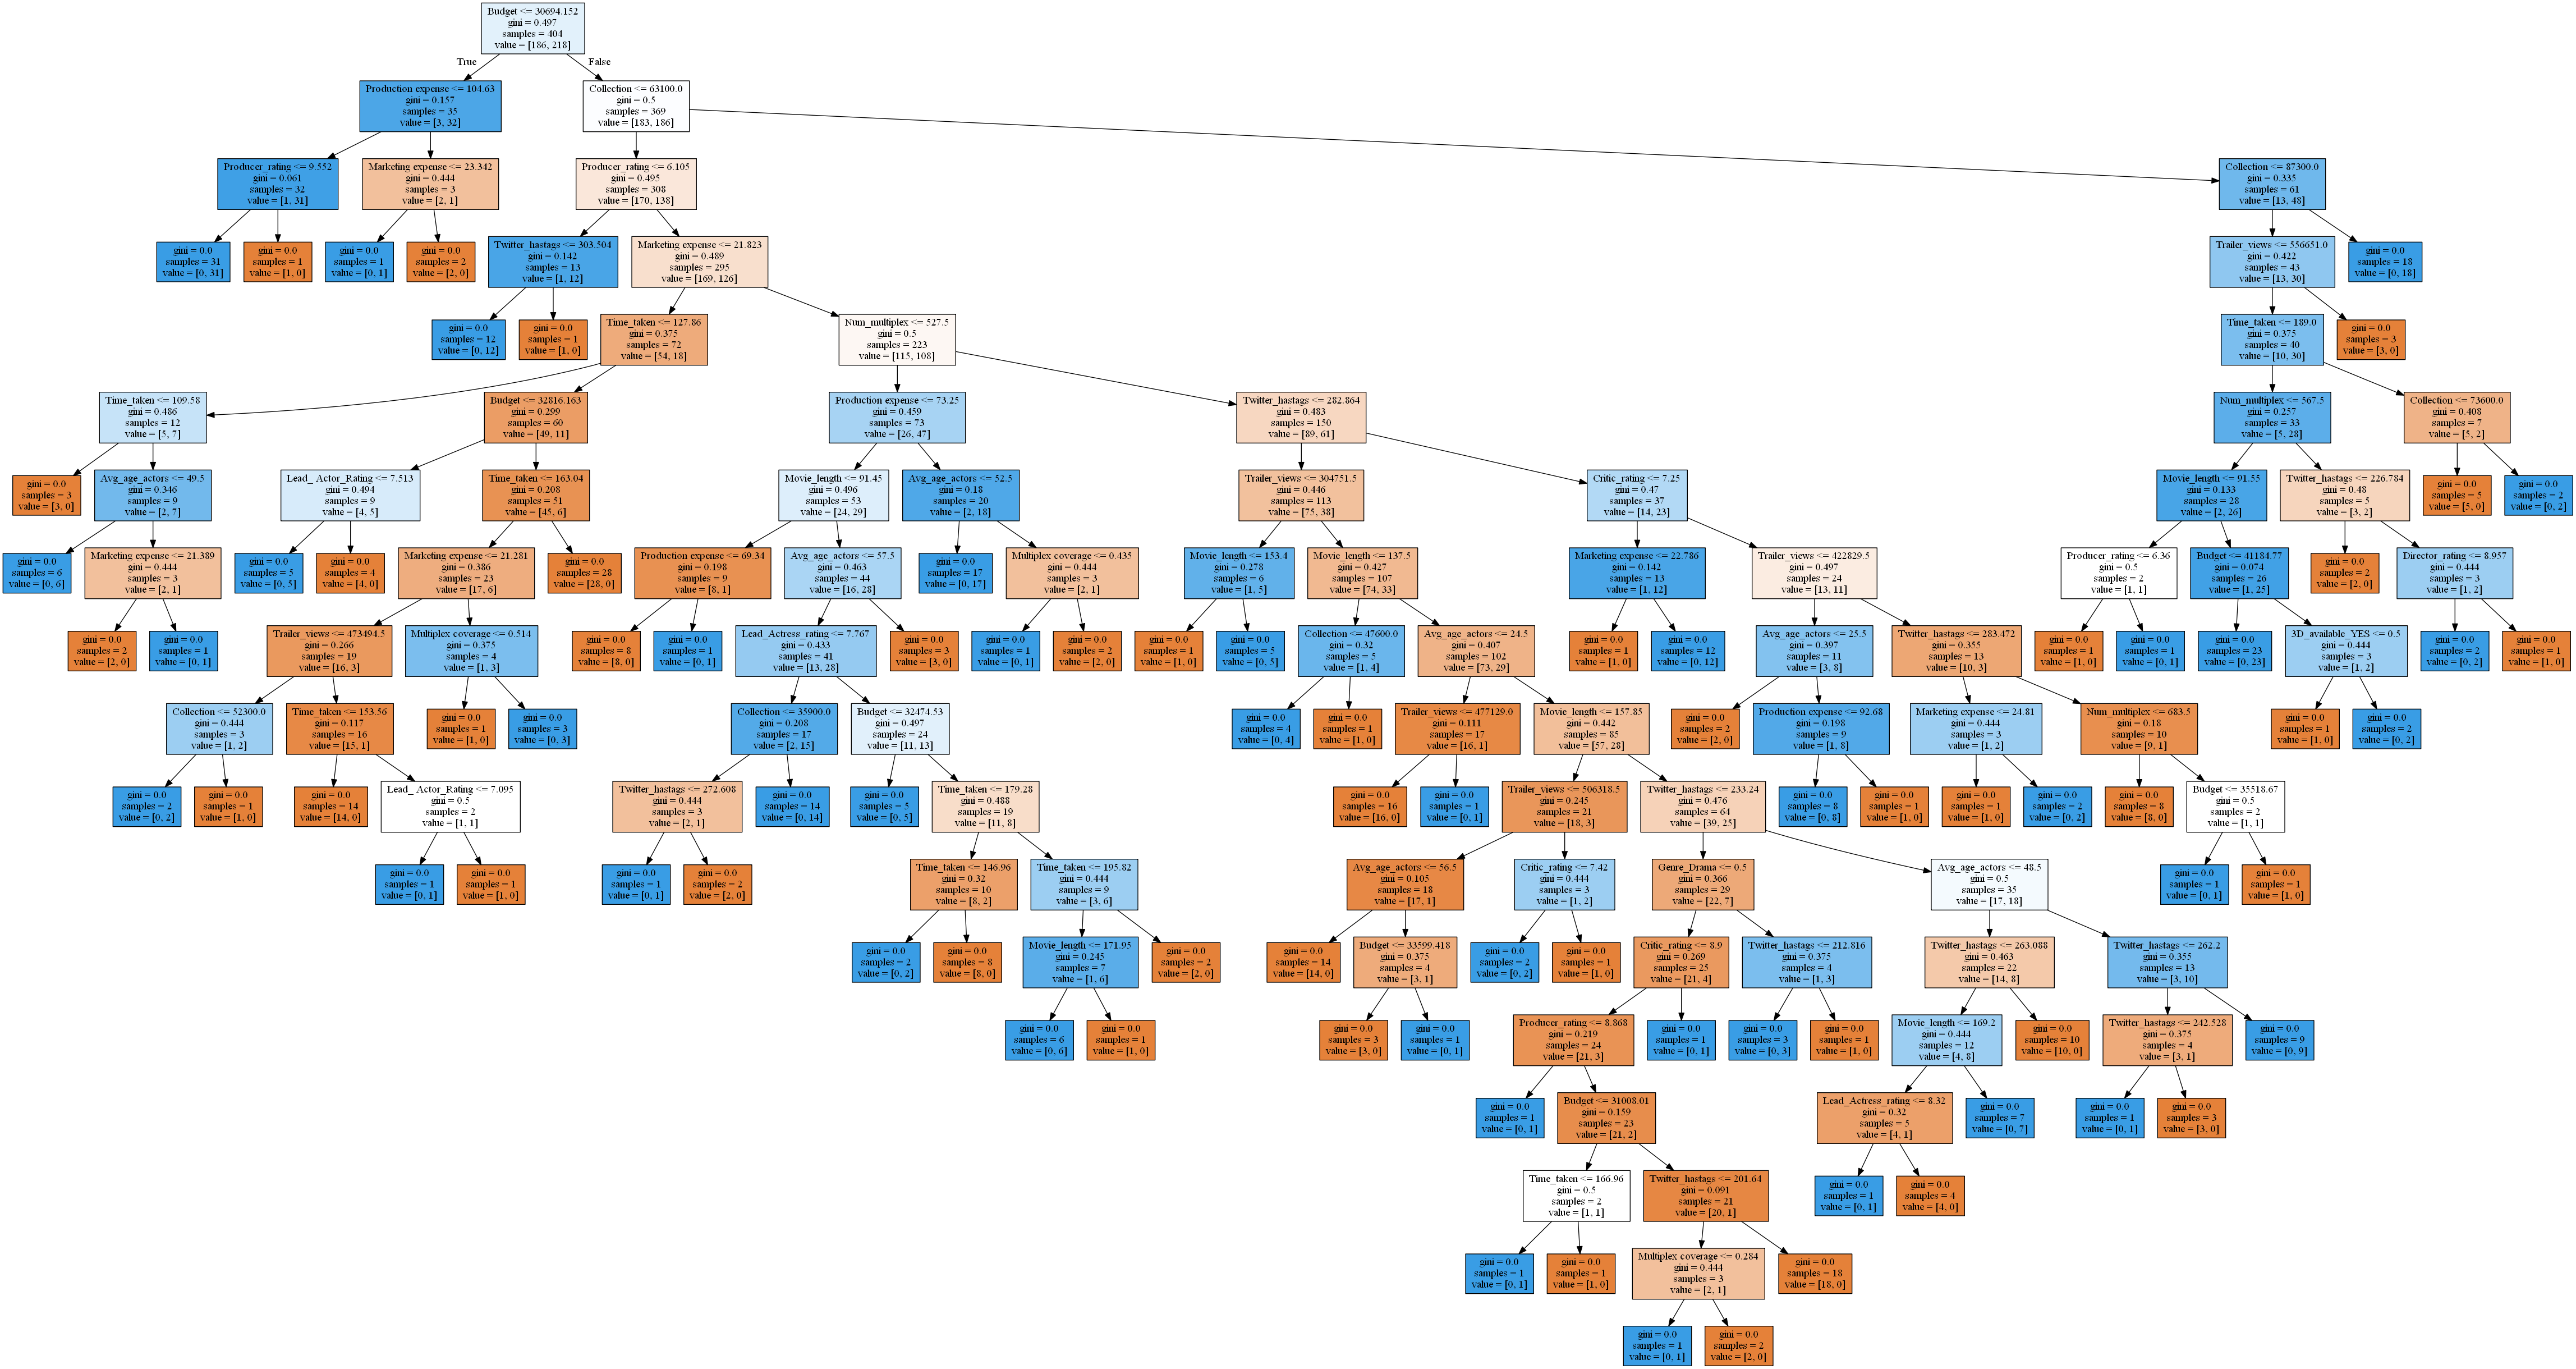

In [40]:
clf_tree2=DecisionTreeClassifier()
clf_tree2.fit(x_train,y_train)
dot_data=tree.export_graphviz(clf_tree2,out_file=None,feature_names=x_train.columns,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Controlling the tree growth 

In [40]:
#to avoid overfitting we have minimum sample leaf 

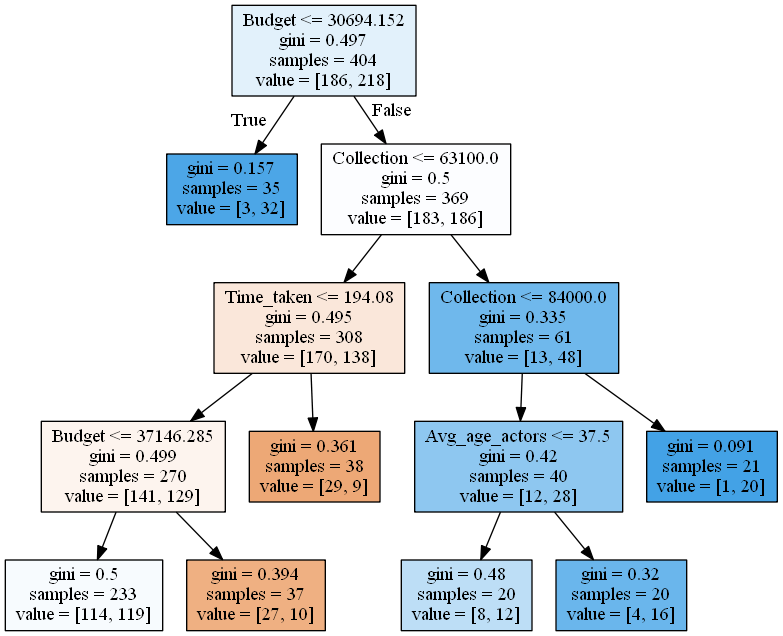

In [41]:
clf_tree2=DecisionTreeClassifier(min_samples_leaf=20,max_depth=4)
clf_tree2.fit(x_train,y_train)
dot_data=tree.export_graphviz(clf_tree2,out_file=None,feature_names=x_train.columns,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [42]:
accuracy_score(y_test,clf_tree2.predict(x_test))  #still the accuracy score is 55%

0.5588235294117647

# Bagging

In [43]:
from sklearn.tree import DecisionTreeClassifier
clftree=DecisionTreeClassifier()

In [44]:
from sklearn.ensemble import BaggingClassifier
b_clf=BaggingClassifier(base_estimator=clftree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)
b_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [46]:
confusion_matrix(y_test,b_clf.predict(x_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [47]:
accuracy_score(y_test,b_clf.predict(x_test))

0.6176470588235294

# random forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
r_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [88]:
r_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [89]:
confusion_matrix(y_train,r_clf.predict(x_train))

array([[186,   0],
       [  0, 218]], dtype=int64)

In [91]:
confusion_matrix(y_test,r_clf.predict(x_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [92]:
accuracy_score(y_train,r_clf.predict(x_train))

1.0

In [93]:
accuracy_score(y_test,r_clf.predict(x_test))

0.6372549019607843

# grid Search

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
rf_clf=RandomForestClassifier(n_estimators=250,random_state=42)

In [96]:
params_grid={'max_features':[4,5,6,7,8,9,10],'min_samples_split':[2,3,10],}

In [97]:
grid_search=GridSearchCV(rf_clf,params_grid,n_jobs=-1,cv=5,scoring='accuracy')

In [98]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [99]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [100]:
cvrf_clf=grid_search.best_estimator_
cvrf_clf

RandomForestClassifier(max_features=6, min_samples_split=3, n_estimators=250,
                       random_state=42)

In [101]:
confusion_matrix(y_train,cvrf_clf.predict(x_train))

array([[186,   0],
       [  0, 218]], dtype=int64)

In [102]:
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[25, 19],
       [19, 39]], dtype=int64)

In [103]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.6274509803921569

# Gradient boosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier()
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [105]:
accuracy_score(y_test,gb_clf.predict(x_test))

0.5784313725490197

In [106]:
gb_clf2=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)

In [107]:
gb_clf2.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [108]:
accuracy_score(y_train,gb_clf2.predict(x_train))

0.7623762376237624

In [109]:
accuracy_score(y_test,gb_clf2.predict(x_test))

0.6176470588235294

# Ada boosting

In [110]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(n_estimators=5000,learning_rate=0.02)

In [111]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [112]:
accuracy_score(y_train,ada_clf.predict(x_train))

0.8886138613861386

In [113]:
accuracy_score(y_test,ada_clf.predict(x_test))

0.6274509803921569

In [114]:
ada_clf1=AdaBoostClassifier(r_clf,learning_rate=0.05,n_estimators=5000)

In [115]:
ada_clf1.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                         n_jobs=-1,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=5000)

In [116]:
accuracy_score(y_train,ada_clf1.predict(x_train))

1.0

In [117]:
accuracy_score(y_test,ada_clf1.predict(x_test))

0.6372549019607843